In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 

In [2]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load(
    'imdb_reviews/subwords8k',
    with_info=True,
    as_supervised=True
)

In [4]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
train_dataset

<DatasetV1Adapter shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [6]:
next(iter(train_dataset))

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
 array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
        5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
           3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
          79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
          33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
          27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
          19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
         102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
           3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
           2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
         102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
          27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
          12,  258, 2306,   13,   91,   29,  171,   52,  229,    

In [7]:
encoder = info.features['text'].encoder

In [8]:
encoder.vocab_size

8185

In [9]:
sample_string = 'Hello Tensorflow'

encoded_string = encoder.encode(sample_string)

In [10]:
encoded_string

[4025, 222, 6307, 2327, 2934]

In [11]:
encoder.decode(encoded_string)

'Hello Tensorflow'

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [13]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, ([None],[]))

In [14]:
test_dataset = test_dataset.padded_batch(BATCH_SIZE, ([None],[]))

In [15]:
next(iter(train_dataset))

(<tf.Tensor: shape=(64, 1508), dtype=int64, numpy=
 array([[ 324,   12,   18, ...,    0,    0,    0],
        [6737,  963,   76, ...,    0,    0,    0],
        [ 977,   12,   18, ...,    0,    0,    0],
        ...,
        [4344,    2,   82, ...,    0,    0,    0],
        [3535,    2,   39, ...,    0,    0,    0],
        [ 156,   37,   52, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64,), dtype=int64, numpy=
 array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])>)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [18]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 166s 425ms/step - loss: 0.6639 - accuracy: 0.5364 - val_loss: 0.5002 - val_accuracy: 0.7786
Epoch 2/10
391/391 [==============================] - 163s 417ms/step - loss: 0.3609 - accuracy: 0.8499 - val_loss: 0.3603 - val_accuracy: 0.8583
Epoch 3/10
391/391 [==============================] - 164s 420ms/step - loss: 0.2642 - accuracy: 0.8968 - val_loss: 0.3898 - val_accuracy: 0.8375
Epoch 4/10
391/391 [==============================] - 166s 426ms/step - loss: 0.2197 - accuracy: 0.9158 - val_loss: 0.3342 - val_accuracy: 0.8604
Epoch 5/10
391/391 [==============================] - 165s 422ms/step - loss: 0.1883 - accuracy: 0.9324 - val_loss: 0.3571 - val_accuracy: 0.8724
Epoch 6/10
391/391 [==============================] - 165s 422ms/step - loss: 0.1691 - accuracy: 0.9392 - val_loss: 0.3880 - val_accuracy: 0.8651
Epoch 7/10
391/391 [==============================] - 165s 422ms/step - loss: 0.1495 - accuracy: 0.9501 - val_loss: 0.3773 -

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/Unknown - 46s 119ms/step - loss: 0.4982 - accuracy: 0.8557Test Loss: 0.4981643313642048
Test Accuracy: 0.855679988861084


In [20]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [21]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [22]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.22812955]]


In [23]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.43735382]]


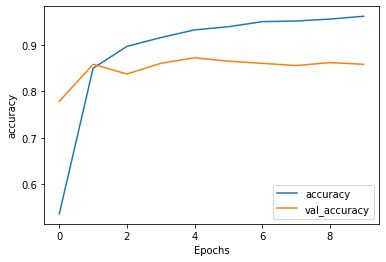

In [24]:
plot_graphs(history, 'accuracy')

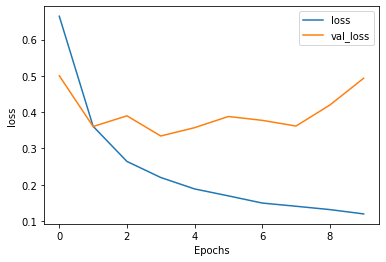

In [25]:
plot_graphs(history, 'loss')

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [28]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=30
)

Epoch 1/10
391/391 [==============================] - 315s 807ms/step - loss: 0.6726 - accuracy: 0.5338 - val_loss: 0.5223 - val_accuracy: 0.7703
Epoch 2/10
391/391 [==============================] - 310s 792ms/step - loss: 0.3848 - accuracy: 0.8402 - val_loss: 0.3591 - val_accuracy: 0.8573
Epoch 3/10
391/391 [==============================] - 312s 799ms/step - loss: 0.2738 - accuracy: 0.9003 - val_loss: 0.3473 - val_accuracy: 0.8531
Epoch 4/10
391/391 [==============================] - 311s 795ms/step - loss: 0.2192 - accuracy: 0.9248 - val_loss: 0.3526 - val_accuracy: 0.8495
Epoch 5/10
391/391 [==============================] - 313s 800ms/step - loss: 0.1913 - accuracy: 0.9367 - val_loss: 0.4208 - val_accuracy: 0.8495
Epoch 6/10
391/391 [==============================] - 313s 801ms/step - loss: 0.1672 - accuracy: 0.9466 - val_loss: 0.3839 - val_accuracy: 0.8635
Epoch 7/10
391/391 [==============================] - 311s 796ms/step - loss: 0.1384 - accuracy: 0.9598 - val_loss: 0.4437 -

model

In [31]:
test_loss, test_acc = model.evaluate(test_dataset)

    391/Unknown - 84s 214ms/step - loss: 0.5422 - accuracy: 0.8547

In [ ]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')

In [33]:
predictions = sample_predict(sample_pred_text, pad=False)

In [34]:
predictions

array([[-0.11863977]], dtype=float32)

In [36]:
predictions = sample_predict(sample_pred_text, pad=True)

In [37]:
predictions

array([[-1.1193267]], dtype=float32)

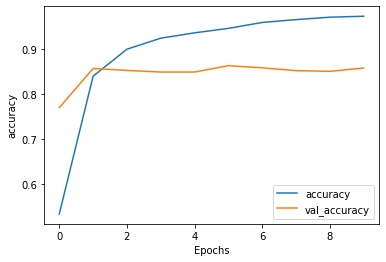

In [38]:
plot_graphs(history, 'accuracy')

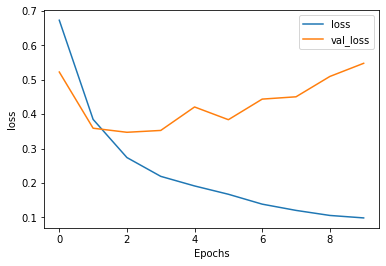

In [39]:
plot_graphs(history, 'loss')